# Evaluation of multiple models - How to choose the best models for our needs?

We need to take various variables into the exercise. Choosing the right model is not an obvious task. 

What to keep in mind upon choosing the best model?

* size od the dataset, 
* number of features (more features can leads toward longer processing time)
* type of the model in case of the dataset size - some models, can perform better than others but need more data to train (neural networks),
* easier models, are easier to explaing to stakeholders.

## Regresssion models evaluation
* RMSE,
* R-squared.

## Classification models evaluation
* Accuracy,
* Confusion matrix,
* Precision, recall, F1-scorem
* ROC AUC

## Scaling for best results?

Some models - which are build upon some distance measuring - can be strongly affected by scaling. 

*Remember to deal with outliers upon normalization, because they can strongly affect model performance.*

Models performance, that will welcome the well performed scaling:
* KNN, 
* Linear Regression (Ridge and Lasso also),
* Logistic Regression,
* Neural Networks.



## Example

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
df = pd.read_csv('music_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   popularity        1000 non-null   float64
 2   acousticness      1000 non-null   float64
 3   danceability      1000 non-null   float64
 4   duration_ms       1000 non-null   float64
 5   energy            1000 non-null   float64
 6   instrumentalness  1000 non-null   float64
 7   liveness          1000 non-null   float64
 8   loudness          1000 non-null   float64
 9   speechiness       1000 non-null   float64
 10  tempo             1000 non-null   float64
 11  valence           1000 non-null   float64
 12  genre             1000 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 101.7 KB


In [7]:
X = df.drop('genre', axis=1).values
y = df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [8]:
models = {'logreg': LogisticRegression(),
          'knn': KNeighborsClassifier(),
          'tree': DecisionTreeClassifier()}
results = []                              

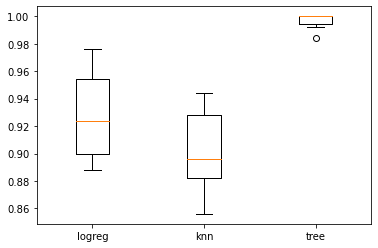

In [11]:
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    cv_res = cross_val_score(model,X_train_sc, y_train, cv = kf)
    results.append(cv_res)
    
plt.boxplot(results, labels = models.keys())
plt.show()

On training set the logistic regression model seems to have the best mean performance. Tree is probably overfitting.

Let's see the performance on test set.

In [13]:
for name, model in models.items():
    model.fit(X_train_sc, y_train)
    test_score = model.score(X_test_sc, y_test)
    print(f'{name} Test set accuracy: {test_score}') 

logreg Test set accuracy: 0.864
knn Test set accuracy: 0.888
tree Test set accuracy: 1.0


And it seems that knn is slightly better on test set. 
Further evaluation of the model would be necessary for the correct evalution.